# Problem 2

The Matrix Equation $Ax = b$ given by 

$$\begin{bmatrix}
1 & 50 \\
0 & 0 \\
\end{bmatrix} * \begin{bmatrix}
x_1  \\
x_2  \\
\end{bmatrix} = \begin{bmatrix}
2  \\
0  \\
\end{bmatrix}$$

In [1]:
A = [ 1. 50; 0 0 ]
b = [2. ; 0]
x_dag = [2/2501 ; 100/2501]
using Test
@test A* x_dag ≈ [2; 0]

Test Passed
  Expression: A * x_dag ≈ [2; 0]
   Evaluated: [2.0, 0.0] ≈ [2, 0]

# Part 1

In [2]:
ϵ = .01

0.01

In [3]:
Aₑ = [1 50; 0 ϵ] 
bₑ = [2; ϵ]
xₑ = Aₑ \ bₑ
println(xₑ)

[-48.0, 1.0]


This is $x_e$. It is very different from the solution to the unperturbed problem, $x^{\dagger}$

## Part 2
Let $\epsilon = 0.01$. Compute the SVD

$$A_{\epsilon} = \sigma_1 u_1 v_1^T + \sigma_2 u_2 v_2^T$$

In [7]:
F = svd(Aₑ)
U = F.U
S = F.S
V = F.V
Vt = F.Vt
@test S[1] .* U[:,1] .* Vt[1,:]' + S[2] .* U[:,2] .* Vt[2,:]' ≈ Aₑ
@test U * diagm(S) * V' ≈ Aₑ

xₛ = 1/S[1] * V[:,1] * U[:,1]' * bₑ
println(xₛ)
@test norm(xₛ - x_dag) < .00001


[0.0007996808633858827, 0.039984044768016376]


Test Passed
  Expression: norm(xₛ - x_dag) < 1.0e-5
   Evaluated: 3.837762265026171e-8 < 1.0e-5

This is basically $A^{\dagger}$. It is very different from $A_e$.  We'll also use the SVD method on the unperturbed A and see if it's close to $x_{svd}$

In [8]:
F_a = svd(A)
U_a = F_a.U
S_a = F_a.S
V_a = F_a.V
Vt_a = F_a.Vt
@test S_a[1] .* U_a[:,1] .* Vt_a[1,:]' + S_a[2] .* U_a[:,2] .* Vt_a[2,:]' ≈ A
@test U_a * diagm(S_a) * V_a' ≈ A

xₐ =  1/S_a[1] * V_a[:,1] * U_a[:,1]' * bₑ
@test xₐ ≈ x_dag


Test Passed
  Expression: xₐ ≈ x_dag
   Evaluated: [0.0007996801279488208, 0.039984006397441034] ≈ [0.0007996801279488205, 0.03998400639744103]

## Part 3

In [12]:
λs = 10.0 .^ range(start = -5, stop = 2, length = 100)

b̂ = [2; ϵ ; 0 ; 0]
function findError(λ)
    Aₗ = [1 50; 0 ϵ ; λ 0 ; 0 λ]
    return norm(Aₑ * (Aₗ \ b̂) - bₑ)
end

function findNorm(λ)
    Aₗ = [1 50; 0 ϵ ; λ 0 ; 0 λ]
    return norm(Aₗ \ b̂)
end

es = findError.(λs)
mags = findNorm.(λs)

100-element Vector{Float64}:
 47.89064112181799
 47.844700701254745
 47.78122379894799
 47.693593142450226
 47.572764103401596
 47.406437111095265
 47.17800452645437
 46.86526272810329
 46.438935810402846
 45.86117115528621
 45.0843717925966
 44.05105344956643
 42.695839735370484
  ⋮
  0.035988083333949934
  0.03465276055620974
  0.03295913467351914
  0.030869711727774547
  0.028378270618773738
  0.025525266027068196
  0.022405731394902602
  0.01916244949095015
  0.015962515331926597
  0.012964353757087365
  0.010288218660008834
  0.008000967697034561

In [13]:
using Plots

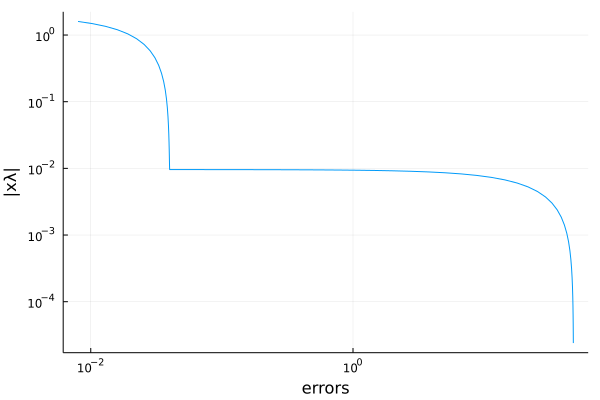

In [20]:
plot(mags,es, xaxis=:log, yaxis=:log,xlabel="errors",ylabel="|xλ|", leg = false)